# Assignment 2  <font color="blue"> (15 points) </font>
 
***

### General Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries. 
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly. 
  + If we want you to use a specific library, then we will state it clearly. 
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + Use text cells for explanations. Use explanation and plain text as much as possible. 
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows: 
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. 
    
  Good luck! 

In [1]:

# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## **Part A** <font color="blue">(7 points)</font>

1. **<font color=blue> (1 point) </font>** Download `Credit.csv` from <http://faculty.marshall.usc.edu/gareth-james/ISL/data.html> and upload it into this notebook. Print the first $5$ rows of the data. Using appropriate descriptive statistics or visualization methods describe the variables and possible association amongst them. Interpret the results. 
2. **<font color=blue> (0.5 points)</font>** Keep only `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education`, and `Balance` as your variables and throw the rest of variables away. Print the dimension of this new dataset. 
3.  **<font color=blue> (0.5 points) </font>** Create a binary variable `Balance_1500` which equals $1$ for the observations with `Balance` $> 1500$, and equals $0$ otherwise.
4. **<font color=blue> (3 points) </font>** Model `Balance_1500` by the explanatory variables `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education` using the following models: 
    + logistic regression, 
    + linear discriminant, and 
    + quadratic discriminant.
8. **<font color=blue> (0.5 points) </font>** Find the probability of (`Balance` $> 1500$), for the following values, using all three aforementionned methods:

|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   | 
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

</br>
Compare the probabilities and comment.
    
9. **<font color=blue> (1.5 points) </font>** For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment. 

In [2]:
#import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# styles
plt.style.use("ggplot")
sns.set_style("whitegrid")
%matplotlib inline

In [4]:
# part A1
credit_df =  pd.read_csv("Credit.csv", index_col=0)

In [5]:
credit_df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [6]:
credit_df.describe().transpose()
# credit_df.info()

,count,mean,std,min,25%,50%,75%,max
Income,400.0,45.218885,35.244273,10.354,21.00725,33.1155,57.47075,186.634
Limit,400.0,4735.600000,2308.198848,855.000,3088.00000,4622.5000,5872.75000,13913.000
Rating,400.0,354.940000,154.724143,93.000,247.25000,344.0000,437.25000,982.000
Cards,400.0,2.957500,1.371275,1.000,2.00000,3.0000,4.00000,9.000
Age,400.0,55.667500,17.249807,23.000,41.75000,56.0000,70.00000,98.000
Education,400.0,13.450000,3.125207,5.000,11.00000,14.0000,16.00000,20.000
Balance,400.0,520.015000,459.758877,0.000,68.75000,459.5000,863.00000,1999.000


<Figure size 864x360 with 0 Axes>

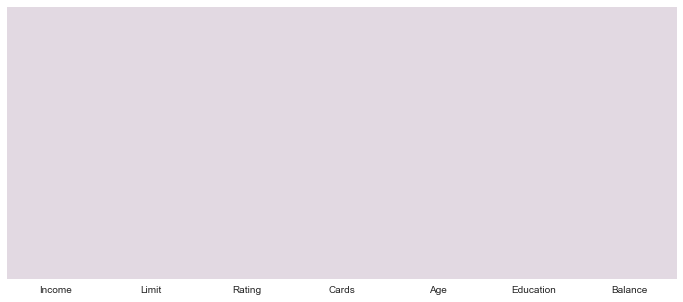

In [7]:
#Checking for missing values
plt.figure(figsize=(12, 5))
sns.heatmap(credit_df.corr().isnull(), cmap ="twilight_r", yticklabels=False, cbar = False, )

No missing values

<Figure size 864x360 with 0 Axes>

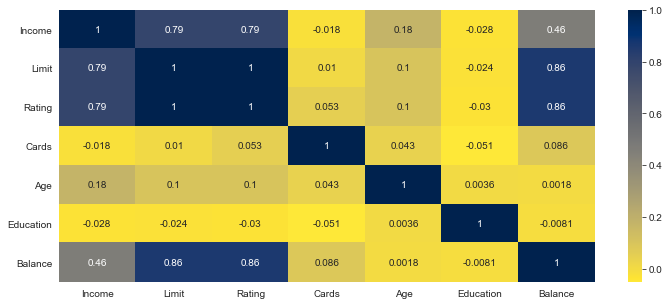

In [8]:
# correlation check
plt.figure(figsize = (12, 5))
sns.heatmap(credit_df.corr(), yticklabels=True, annot=True, cmap='cividis_r')

The predictors Limit and Rating are highly correlated with each otheer which means that a change in one variable would cause change to another and so the model results fluctuate significantly. The model results will be unstable and vary a lot given a small change in the data or model. Collinearity reduces the accuracy of the estimates of the regression coefficients, it causes the standard error for $\hat{β}_j$ to grow. We can determine how much wider the variance of your predictors' sampling distributions are as a result of the correlation by using the Variance Inflation Factor (VIF) (in the next cell).

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


credit_df_numeric=pd.DataFrame(credit_df.drop(["Gender", "Student", "Married", "Ethnicity"], axis=1))
X = credit_df_numeric.assign(const=0)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

Income         12.498855
Limit        1112.420530
Rating       1220.039515
Cards           8.123121
Age            10.383347
Education      11.814555
Balance        15.731036
const                NaN
dtype: float64

As we suspected, there is considerable collinearity in the data! This implies that most of the information in Limit is sucked up in ratings. When faced with the problem of collinearity, there are two simple solutions. 

The first is to drop one of the problematic variables from the regression. This can usually be done without much compromise to the regression fit, since the presence of collinearity implies that the information that this variable provides about the response is redundant in the presence of the other variables. For instance, if we regress balance onto age and limit,
without the rating predictor, then the resulting VIF values are close to the minimum possible value of 1, and the $R^2$ drop is quite insignificant. So dropping rating from the set of predictors has effectively solved thecollinearity problem without compromising the fit. The second solution is to combine the collinear variables together into a single predictor. So we could combine both Rating and Limit as a single variale. 


<Figure size 1036.8x432 with 0 Axes>

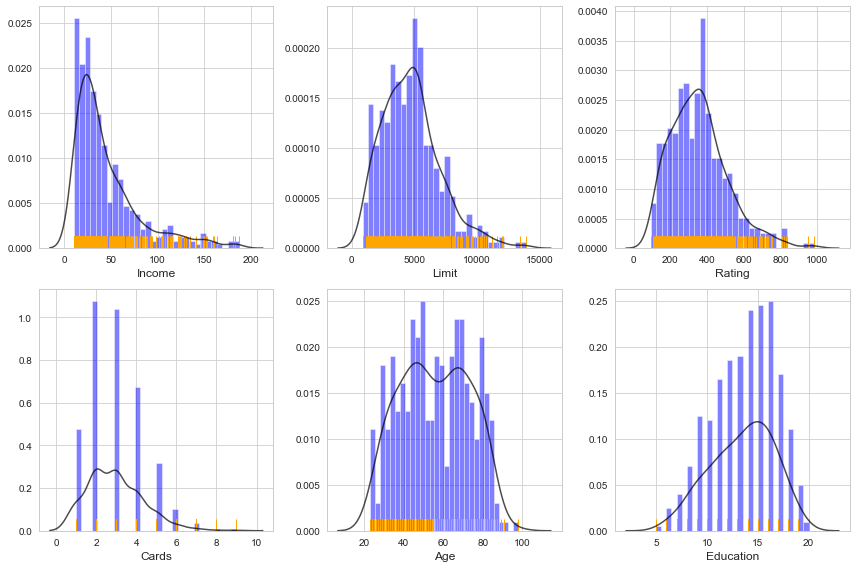

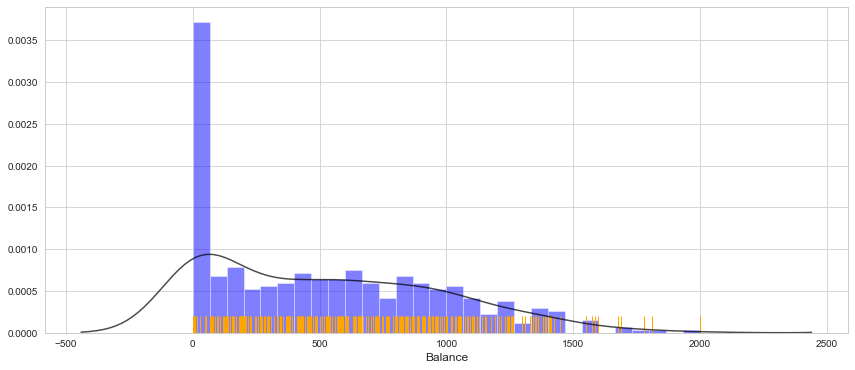

In [11]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize = (12, 8))

for i, ax in zip([list(credit_df)[index] for index in list(range(0, 6))], axes.flat):
    sns.distplot(credit_df[i], bins = 30, hist_kws={"histtype": "bar", "linewidth":  0.8 ,"alpha": 0.5, "color": "blue"}, ax=ax, 
                 kde_kws={"color":"black", "alpha" : 0.7}, 
                 rug=True, rug_kws={"color":"orange"})

plt.tight_layout()

plt.figure(figsize=(14.4, 6))
sns.distplot(credit_df["Balance"], bins = 30, hist_kws={"histtype": "bar", "linewidth":  0.8 ,"alpha": 0.5, "color": "blue"},
                 kde_kws={"color":"black", "alpha" : 0.7}, 
                 rug=True, rug_kws={"color":"orange"})

Most of the variables seems to be "almost" normally distributed except for Income and Balance that is tail-heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. Since Income significantly affect Balance, when spliting the data into testing and training sest, we could use a stratified sampling technique to have an almost equal proportion of stratum in both sets.

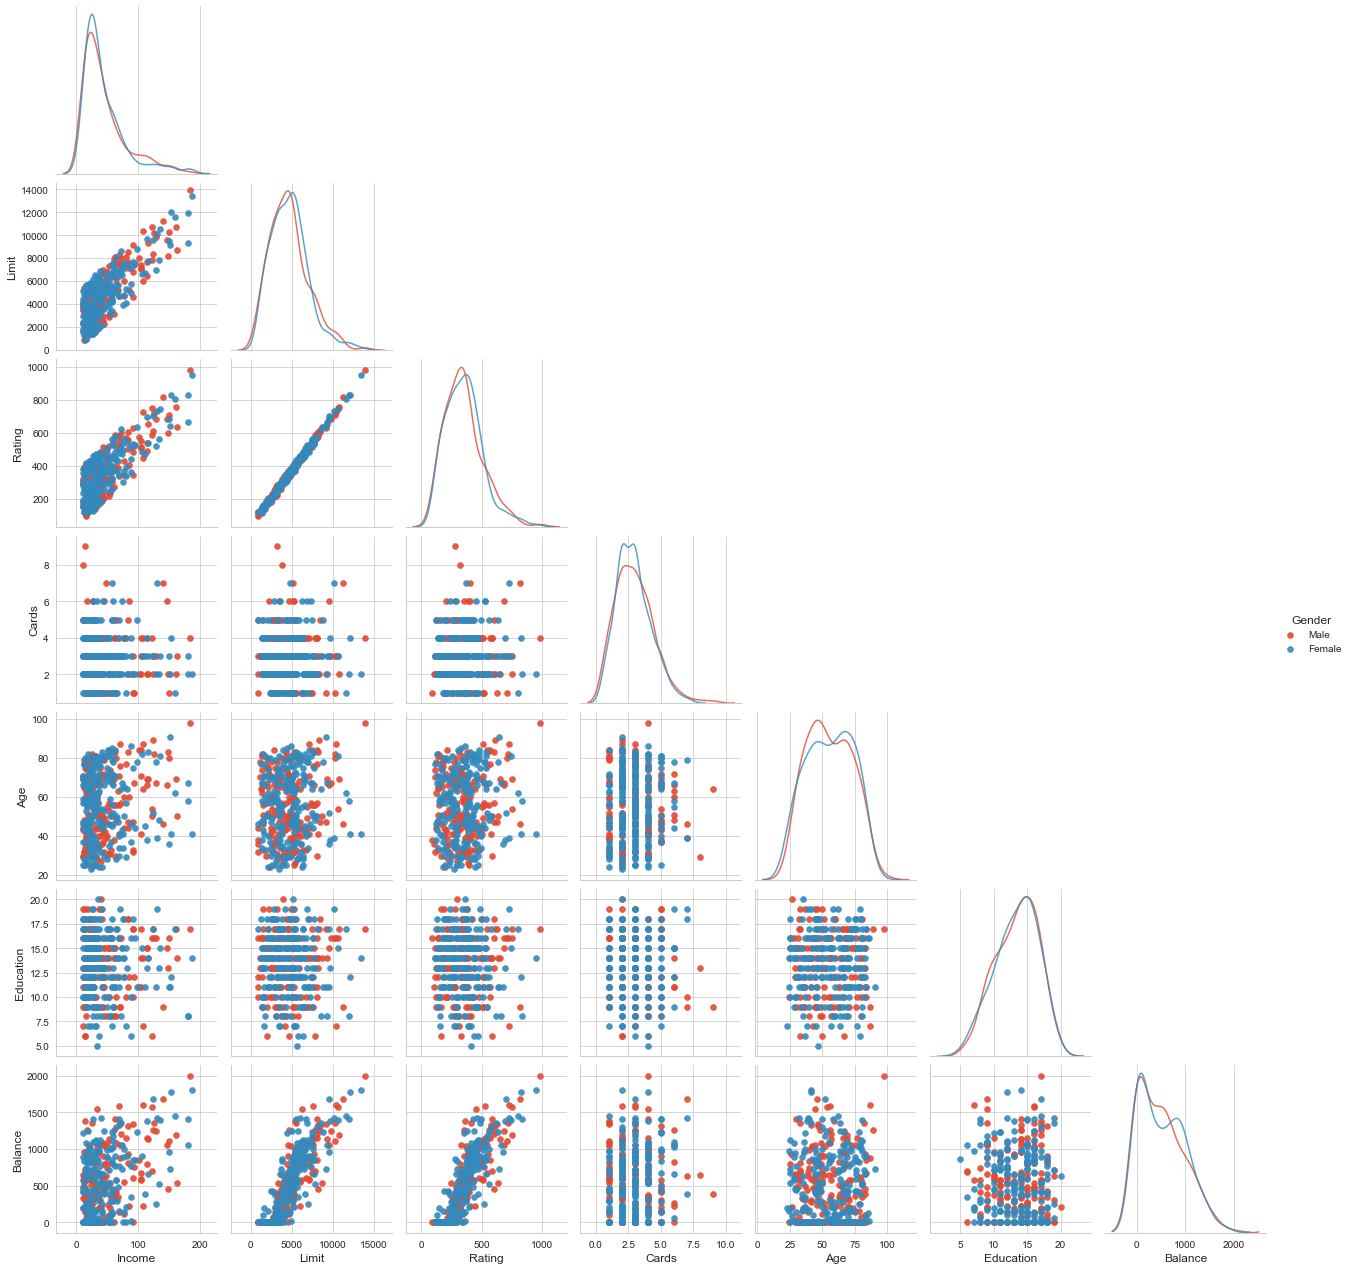

In [12]:
g = sns.PairGrid(credit_df, diag_sharey=False, corner=True, hue="Gender")
g.map_diag(sns.kdeplot, alpha = 0.8)
g.map_offdiag(plt.scatter, alpha = 0.9)
g.add_legend()

Gender
Female    AxesSubplot(0.125,0.551739;0.344444x0.328261)
Male      AxesSubplot(0.125,0.551739;0.344444x0.328261)
Name: Balance, dtype: object

Student
No     AxesSubplot(0.555556,0.551739;0.344444x0.328261)
Yes    AxesSubplot(0.555556,0.551739;0.344444x0.328261)
Name: Balance, dtype: object

Married
No     AxesSubplot(0.125,0.125;0.344444x0.328261)
Yes    AxesSubplot(0.125,0.125;0.344444x0.328261)
Name: Balance, dtype: object

Ethnicity
African American    AxesSubplot(0.555556,0.125;0.344444x0.328261)
Asian               AxesSubplot(0.555556,0.125;0.344444x0.328261)
Caucasian           AxesSubplot(0.555556,0.125;0.344444x0.328261)
Name: Balance, dtype: object

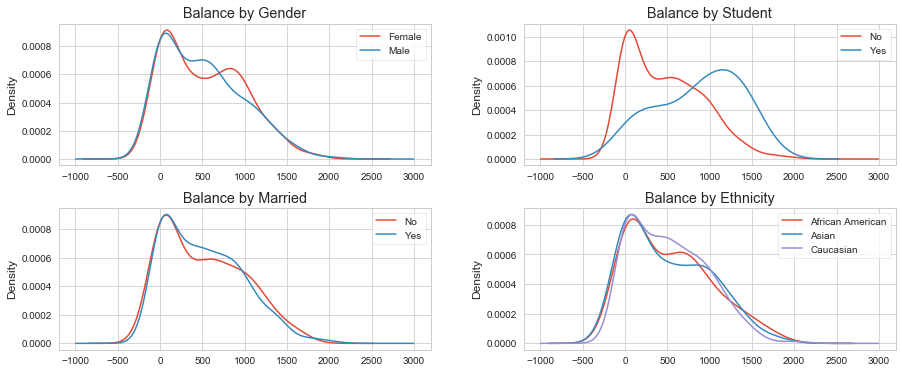

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 6))
fig.subplots_adjust(hspace=.3, wspace=.25)
credit_df.groupby('Gender').Balance.plot(kind='kde', ax=axes[0][0], legend=True, title='Balance by Gender')
credit_df.groupby('Student').Balance.plot(kind='kde', ax=axes[0][1], legend=True, title='Balance by Student')
credit_df.groupby('Married').Balance.plot(kind='kde', ax=axes[1][0], legend=True, title='Balance by Married')
credit_df.groupby('Ethnicity').Balance.plot(kind='kde', ax=axes[1][1], legend=True, title='Balance by Ethnicity')

From the plot, it shows as though your Gender, marital status (Married or not) or Ethnicity has little or nothing to do with one's Balance since they all have almost identical distribution. However, each of the variable was treated as a single predictor. Combining these predictors together may likely have a different interpretation. 

However, the "Balance by Students" plot indicates that students tend to have higher credit balance than non-students. Again, the plot was drawn using just the balance preditor. If all other predictors are being put into consideration like ethnicity, age, income, non-students may have higher credit balance than students. 

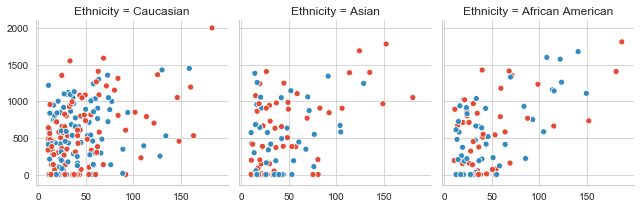

In [14]:
g = sns.FacetGrid(credit_df, col = "Ethnicity")
g.map_dataframe(sns.scatterplot, x = "Income", y = "Balance", hue = "Gender")

This plot was treated as though we are using 2 predictors: Ethnicity and Income. From this plot, there is a slight correlation between African American and Balance, and it looks like females are more likely to have higher credit balance than males. 

In [15]:
# part A2
credit_df.drop(["Gender", "Student", "Married", "Ethnicity"], axis=1, inplace=True) 

In [16]:
print(f"The credit_df dataset has {bcolors.BOLD}{credit_df.shape[0]}{bcolors.ENDC} rows and {bcolors.BOLD}{credit_df.shape[1]}{bcolors.ENDC} columns")

The credit_df dataset has 400 rows and 7 columns


In [17]:
# part A3
def binary_var(balance):
    if balance > 1500:
        return 1
    return 0

Balance_1500 = credit_df["Balance"].apply(binary_var)

In [18]:
Balance_1500.value_counts()

0    391
1      9
Name: Balance, dtype: int64

This is a case of unbalanced data set. The dataset will be divided into train and test sets using stratifird method.

In [19]:
X = credit_df.drop("Balance", axis =1)
y = Balance_1500

In [20]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split(X,y):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]

Decided to split the dataset since we are mostly always interested in the test error and not the training error. 

In [21]:
num_pipe = Pipeline([
    ("scaler", StandardScaler()), 
    ("impute", SimpleImputer(strategy="median"))
])

X_train_scaled = num_pipe.fit_transform(X_train)

In [22]:
# part A4
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [23]:
pred_log = log_reg.predict(num_pipe.transform(X_test))

In [24]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
pred_lda = lda.predict(num_pipe.transform(X_test))

LinearDiscriminantAnalysis()

In [25]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)
pred_qda = qda.predict(num_pipe.transform(X_test))

QuadraticDiscriminantAnalysis()

In [26]:
log_reg.predict_proba([[63, 8100, 600, 4, 30, 13], [186, 13414, 950, 2, 41, 13]])
lda.predict_proba([[63, 8100, 600, 4, 30, 13], [186, 13414, 950, 2, 41, 13]])
qda.predict_proba([[63, 8100, 600, 4, 30, 13], [186, 13414, 950, 2, 41, 13]])

array([[0., 1.],
       [0., 1.]])

array([[0., 1.],
       [0., 1.]])

array([[0., 1.],
       [0., 1.]])

In [27]:
print(bcolors.BOLD + "Accuracy" + bcolors.ENDC)
print(f"Logistic_Regression: {accuracy_score(pred_log, y_test)}")
print(f"LDA:{accuracy_score(y_test, pred_lda)}")
print(f"QDA: {accuracy_score(pred_qda, y_test)}\n")

print(bcolors.BOLD + "AUC" + bcolors.ENDC)
print(f"Logistic_Regression: {roc_auc_score(y_test, pred_log)}")
print(f"LDA:{roc_auc_score(y_test, pred_lda)}")
print(f"QDA: {roc_auc_score(y_test, pred_qda)}\n")

print(bcolors.BOLD + "confusion matrix" + bcolors.ENDC)
print(f"Logistic_Regression \n{confusion_matrix(y_test, pred_log)}")
print(f"LDA: \n{confusion_matrix(y_test, pred_lda)}")
print(f"QDA: \n{confusion_matrix(pred_qda, y_test)}\n")



Accuracy
Logistic_Regression: 0.9875
LDA:0.9875
QDA: 0.975

AUC
Logistic_Regression: 0.9935897435897436
LDA:0.9935897435897436
QDA: 0.5

confusion matrix
Logistic_Regression 
[[77  1]
 [ 0  2]]
LDA: 
[[77  1]
 [ 0  2]]
QDA: 
[[78  2]
 [ 0  0]]



In [28]:
#Training set accuracy

print(bcolors.BOLD + "Accuracy" + bcolors.ENDC)
print(f"Logistic_Regression: {accuracy_score(log_reg.predict(num_pipe.transform(X_train)), y_train)}")
print(f"LDA: {accuracy_score(lda.predict(num_pipe.transform(X_train)), y_train)}")
print(f"QDA: {accuracy_score(qda.predict(num_pipe.transform(X_train)), y_train)}\n")

print(bcolors.BOLD + "AUC" + bcolors.ENDC)
print(f"Logistic_Regression: {roc_auc_score(y_train, log_reg.predict(num_pipe.transform(X_train)))}")
print(f"LDA:{roc_auc_score(y_train, lda.predict(num_pipe.transform(X_train)))}")
print(f"QDA: {roc_auc_score(y_train, qda.predict(num_pipe.transform(X_train)))}\n")

print(bcolors.BOLD + "Confusion matrix" + bcolors.ENDC)
print(f"Logistic_Regression: \n {confusion_matrix(log_reg.predict(num_pipe.transform(X_train)), y_train)}")
print(f"LDA:\n {confusion_matrix(lda.predict(num_pipe.transform(X_train)), y_train)}")
print(f"QDA:\n {confusion_matrix(qda.predict(num_pipe.transform(X_train)), y_train)}\n")

Accuracy
Logistic_Regression: 0.984375
LDA: 0.978125
QDA: 0.990625

AUC
Logistic_Regression: 0.6428571428571428
LDA:0.7094933820173437
QDA: 0.8555454130534004

Confusion matrix
Logistic_Regression: 
 [[313   5]
 [  0   2]]
LDA:
 [[310   4]
 [  3   3]]
QDA:
 [[312   2]
 [  1   5]]



The training set seems to be a good estimate for the test set

## **Part B** <font color="blue">(8 points)</font>

Donwload  `ziptrain.csv` and `ziptest.csv` datasets from  **Athena/Content/Data**. Save them and upload them here as **two separate datasets** and name them `ziptrain` and `ziptest`, respectively. Explore the data in order to understand it. 

  1. **<font color="blue">(1 point)</font>** From `ziptrain` dataset select only the rows corresponding to digits $2$ and $7$ and save them in a new dataset called `binar_train`. Do the same thing in `ziptest` and call it `binar_test`. 
  2. **<font color="blue">(1 point)</font>** Project `binar_train` onto the first **two principal components** and make a scatterplot of the data in the new space (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit. Based on the plot do you think that these two digits can be separated well using only two PCs? Explain.
  3. **<font color="blue">(1 point)</font>** Fit a **logistic regression**, in the new space, to separate digits $2$ and $7$. 
  4. **<font color="blue">(1 point)</font>** Evaluate the trainded model on `binar_test` using **accuracy**, and an **appropriate F-measure**. 
  5. **<font color="blue">(0.5 points)</font>** Build and print a confusion matrix for your predictions.

For the rest of the questions use the **whole training data**, i.e., `ziptrain` (**not** `binar_train`). 

  6. **<font color="blue">(1 point)</font>** Project the whole data onto the first $m=2, 3, 4, 5$ principal components (one $m$ at a time).
  7. **<font color="blue">(1.5 points)</font>** For each $m$, and using **$5$-fold cross-validation**, train a **linear discriminant** classifier on `ziptrain`. 
  8. **<font color="blue">(1 point)</font>** Based on **cross-validated accuracy**, select the best number of principal components $m$.


In [29]:
#part B1
ziptrain =pd.read_csv('ziptrain.csv', header=None, delimiter=" ")
ziptest =pd.read_csv('ziptest.csv',header=None, delimiter=" ")

In [30]:
ziptrain.drop(257, axis=1, inplace=True)

In [31]:
ziptrain

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,3.0,-1.0,-1.0,-1.0,-0.988,-0.527,-0.208,0.620,1.000,0.467,...,-0.116,0.899,0.416,-0.510,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7287,3.0,-1.0,-1.0,-1.0,-0.990,0.708,0.557,0.347,-0.107,-0.758,...,0.697,0.636,0.167,-0.968,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7288,3.0,-1.0,-1.0,-1.0,-0.783,-0.984,-0.827,0.068,1.000,1.000,...,0.805,1.000,1.000,0.727,-0.342,-0.933,-1.000,-1.000,-1.000,-1.0
7289,0.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.549,0.463,0.999,0.999,...,-0.231,0.621,0.999,-0.042,-0.231,-0.687,-1.000,-1.000,-1.000,-1.0


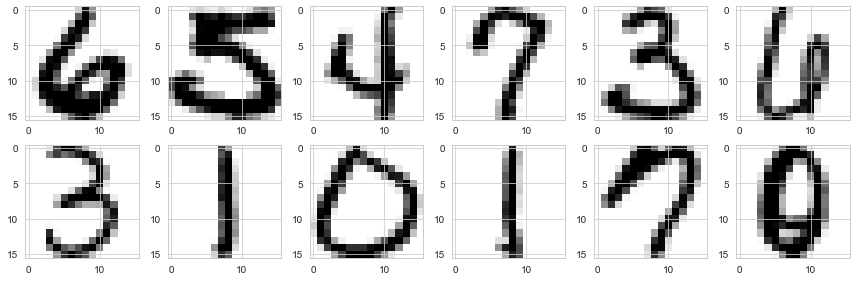

In [32]:
# First 12 Training observations

i = 0
fig, ax = plt.subplots(ncols=6, nrows=2, figsize = (12, 4))
for k in range(0, 2):
    for m in range (0, 6):
        ax[k][m].imshow(ziptrain.values[i][1:].reshape(16,16), cmap = "binary")
        i +=1
plt.tight_layout()


In [33]:
for _ in (ziptrain, ziptest):
    binar_train = ziptrain[(ziptrain.values[:, 0] == 2) | (ziptrain.values[:, 0] == 7)]
    binar_test = ziptest[(ziptest.values[:, 0] == 2) | (ziptest.values[:, 0] == 7)]

In [34]:
# part B2
from sklearn.decomposition import PCA

In [35]:
pipeline_pca = Pipeline([
    ('pca', PCA(n_components=2)), 
    ("scale", StandardScaler())
])

binar_train_pca = pipeline_pca.fit_transform(binar_train.drop(0, axis=1))

<Figure size 864x360 with 0 Axes>

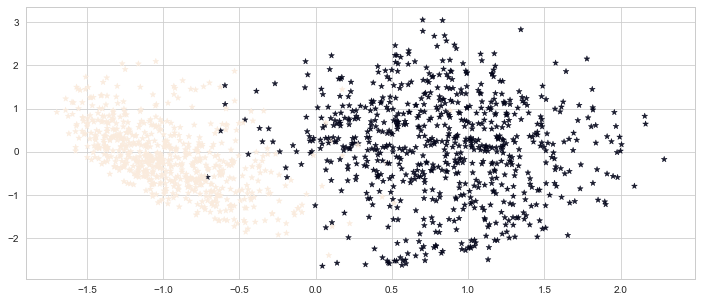

In [36]:
plt.figure(figsize=(12, 5))
plt.scatter(binar_train_pca[:, 0], binar_train_pca[:, 1], c = binar_train.loc[:, 0], alpha = 0.9, marker="*")

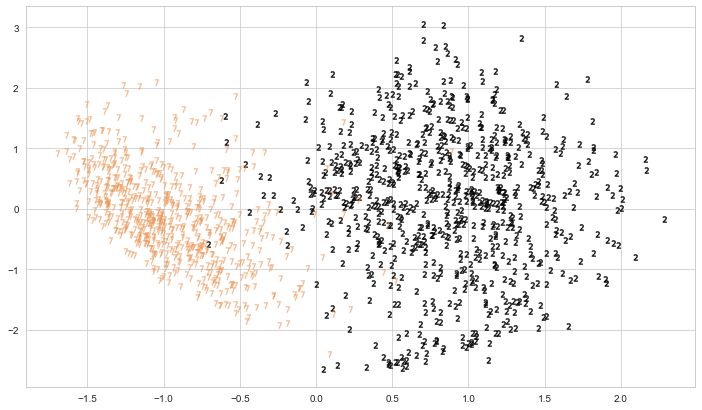

In [37]:
plt.figure(figsize=(12, 7))
plt.scatter(binar_train_pca[binar_train.values[:,0]==2,0], binar_train_pca[binar_train.values[:,0]==2,1], marker='$2$', 
            color='black', alpha = 0.9);

plt.scatter(binar_train_pca[binar_train.values[:,0]==7,0], binar_train_pca[binar_train.values[:,0]==7,1], marker='$7$', 
            color= '#ee934f', alpha = 0.5);

PCs describe variation and account for the varied influences of the original variables. Such influences, or loadings, can be traced back from the PCA plot to find out what produces the differences among clusters. From the plot, 2 principal components did a good job in separating both digits with high accuarcy. 

In [38]:
# part B3
log_pca = LogisticRegression()

In [39]:
log_pca.fit(binar_train_pca, binar_train[0])

LogisticRegression()

In [40]:
binary_test_pca = pipeline_pca.transform(binar_test.drop(0, axis=1))

In [41]:
# part B4
predict_pca = log_pca.predict(binary_test_pca)

In [44]:
print("F1_Score:", f1_score(binar_test[0], predict_pca, average="macro"))
print("Accuracy:", accuracy_score(binar_test[0], predict_pca))
print("\n\n")
print(classification_report(predict_pca, binar_test[0]))

F1_Score: 0.9643766779100984
Accuracy: 0.9652173913043478



              precision    recall  f1-score   support

         2.0       0.97      0.96      0.97       200
         7.0       0.95      0.97      0.96       145

    accuracy                           0.97       345
   macro avg       0.96      0.97      0.96       345
weighted avg       0.97      0.97      0.97       345



In [45]:
# part B5
print("Confusion Matrix:\n", confusion_matrix(predict_pca, binar_test[0]))

Confusion Matrix:
 [[193   7]
 [  5 140]]


In [46]:
# part B6 and part 7
pca = PCA(2)
pca_2  = pca.fit_transform(ziptrain.drop(0, axis=1))

pca3 = PCA(3)
pca_3  = pca3.fit_transform(ziptrain.drop(0, axis=1))

pca4 = PCA(4)
pca_4  = pca4.fit_transform(ziptrain.drop(0, axis=1))

pca5 = PCA(5)
pca_5  = pca5.fit_transform(ziptrain.drop(0, axis=1))

In [47]:
lda_pca = LinearDiscriminantAnalysis()
lda_pca.fit(pca_2, ziptrain[0])

LinearDiscriminantAnalysis()

In [48]:
# Training Accuracy
print("Score_pca_2:", cross_val_score(lda_pca, pca_2, ziptrain[0], scoring = "accuracy", cv=5).mean())
print("Score_pca_3:",cross_val_score(lda_pca, pca_3, ziptrain[0], scoring = "accuracy", cv=5).mean())
print("Score_pca_4:",cross_val_score(lda_pca, pca_4, ziptrain[0], scoring = "accuracy", cv=5).mean())
print("Score_pca_5:",cross_val_score(lda_pca, pca_5, ziptrain[0], scoring = "accuracy", cv=5).mean())

Score_pca_2: 0.5436841100740779
Score_pca_3: 0.5838694785969682
Score_pca_4: 0.6944175079046757
Score_pca_5: 0.7200641023832961


The model with $\textbf{5}$ PCs gave the highest accuracy (72%)

In [49]:
# Test Accuracy
print("Score_pca_2:",cross_val_score(lda_pca, pca.transform(ziptest.drop(0, axis=1)), ziptest[0], scoring = "accuracy", cv=5).mean())
print("Score_pca_3:",cross_val_score(lda_pca, pca3.transform(ziptest.drop(0, axis=1)), ziptest[0], scoring = "accuracy", cv=5).mean())
print("Score_pca_4:",cross_val_score(lda_pca, pca4.transform(ziptest.drop(0, axis=1)), ziptest[0], scoring = "accuracy", cv=5).mean())
print("Score_pca_5:",cross_val_score(lda_pca, pca5.transform(ziptest.drop(0, axis=1)), ziptest[0], scoring = "accuracy", cv=5).mean())

Score_pca_2: 0.5181883599459065
Score_pca_3: 0.5525787521246636
Score_pca_4: 0.6587015049441074
Score_pca_5: 0.6821056810709545


The model with  5  PCs gave the highest accuracy (68%) on the test dataset